In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

import os
root = os.path.abspath("..")
import sys
sys.path.append(root)

Using TensorFlow backend.


In [2]:
from Dataset import *
import Train

In [3]:
mem_size = 16

batch_size = 32
epochs = 1

In [4]:
from dataset.Piano import *

path = os.path.expanduser("~/datasets/Piano-midi.de.pickle")
lib = PianoLib(path)
data_train = DatasetMemsize(lib["train"], mem_size)[:500]
data_test = DatasetMemsize(lib["test"], mem_size)[:500]

In [5]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

model = Sequential()
model.add(LSTM(1024, return_sequences=True, input_shape=(mem_size, lib.classes)))
model.add(Dropout(0.1))
model.add(LSTM(1024))
model.add(Dropout(0.1))
model.add(Dense(lib.classes))
model.add(Activation("sigmoid"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=[])
model.summary()

from keras.models import load_model
model = load_model(root + "/cache/piano_net_q/m12.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16, 1024)          4558848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 1024)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 88)                90200     
_________________________________________________________________
activation_1 (Activation)    (None, 88)                0         
Total params: 13,041,752
Trainable params: 13,041,752
Non-trainable params: 0
________________________________________________________________

Epoch 1 - levenshtein: 0.0011428571428571427 - loss: 3.863171886444092 - val_levenshtein: 0.007933333333333336 - val_loss: 10.823307586669921


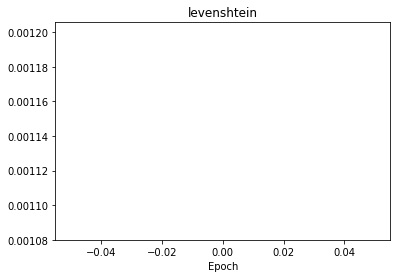

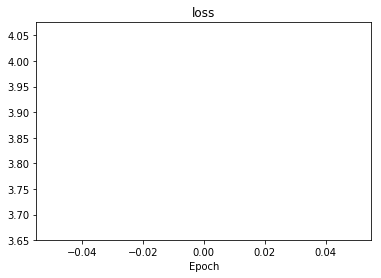

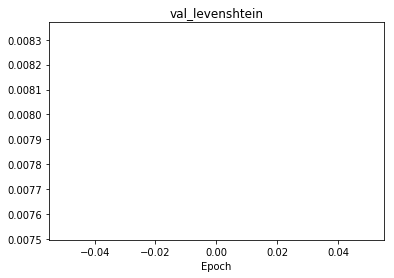

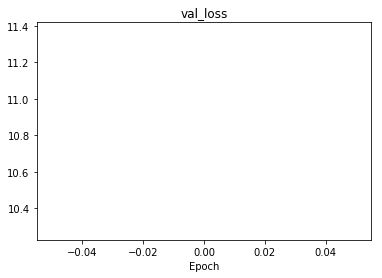

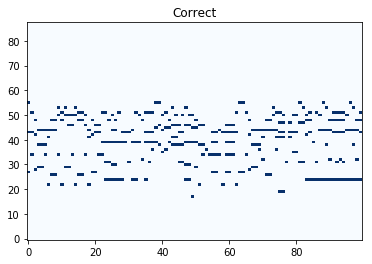

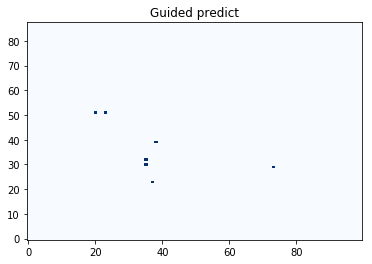

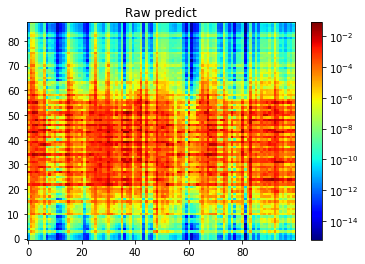

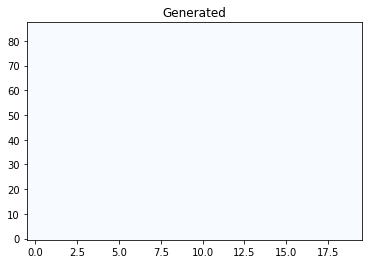

500/500 [==============================] - 901s - loss: 3.8632 - val_loss: 10.8233


In [6]:
from Display import *
train = Train.train(
    root + "/cache/piano_net_q",
    
    model,
    data_train,
    
    data_test=data_test,
    metrics=["levenshtein"],
    
    displays=[progress, predict_seq(multidim=True), demo_midi(lib)],
    ipython=True,
)
train(batch_size=batch_size,
      epochs=epochs)